In [1]:
run readMethionine.py

Methionine/20210701_30_Std01_Met_Std_Full_1e5.txt


c:\Users\tacse\Documents\Modified HPLC Introduction Paper\Reservoir Inject Upload\dataAnalyzerMN_FTStat.py:260: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df = df[df['retTime'].between(timeFrame[0], timeFrame[1], inclusive=True)]


Methionine/20210701_32_Smp01_Met_Methyl_Full_1e5.txt
Methionine/20210701_34_Std02_MetA_Std_Full_1e5.txt
Methionine/20210701_36_Smp02_Met_Methyl_Full_1e5.txt
Methionine/20210701_38_Std03_Met_Std_Full_1e5.txt
Methionine/20210701_40_Smp03_Met_Methyl_Full_1e5.txt
Methionine/20210701_42_Std04_Met_Std_Full_1e5.txt
20210701_30_Std01_Met_Std_Full_1e5.txt D 150 has 203 zero scans, out of 13280 scans (0.015286144578313253)
20210701_32_Smp01_Met_Methyl_Full_1e5.txt D 150 has 249 zero scans, out of 13370 scans (0.01862378459237098)
20210701_34_Std02_MetA_Std_Full_1e5.txt D 150 has 190 zero scans, out of 13284 scans (0.014302920806985848)
20210701_36_Smp02_Met_Methyl_Full_1e5.txt D 150 has 438 zero scans, out of 13393 scans (0.03270365116105428)
20210701_38_Std03_Met_Std_Full_1e5.txt D 150 has 331 zero scans, out of 13302 scans (0.024883476168997144)
20210701_40_Smp03_Met_Methyl_Full_1e5.txt D 150 has 388 zero scans, out of 13389 scans (0.02897901262230189)
20210701_42_Std04_Met_Std_Full_1e5.txt D 

7it [00:17,  2.49s/it]
7it [00:21,  3.09s/it]
7it [00:15,  2.28s/it]
7it [00:14,  2.10s/it]
7it [00:14,  2.08s/it]
7it [00:14,  2.06s/it]
7it [00:27,  3.87s/it]


Failed Subsequence Detection 20210701_42_Std04_Met_Std_Full_1e5.txt 150 15N with a value of 0.66


7it [00:00, ?it/s]


Proportion Above
0.0
Proportion Above
0.3054867256637168


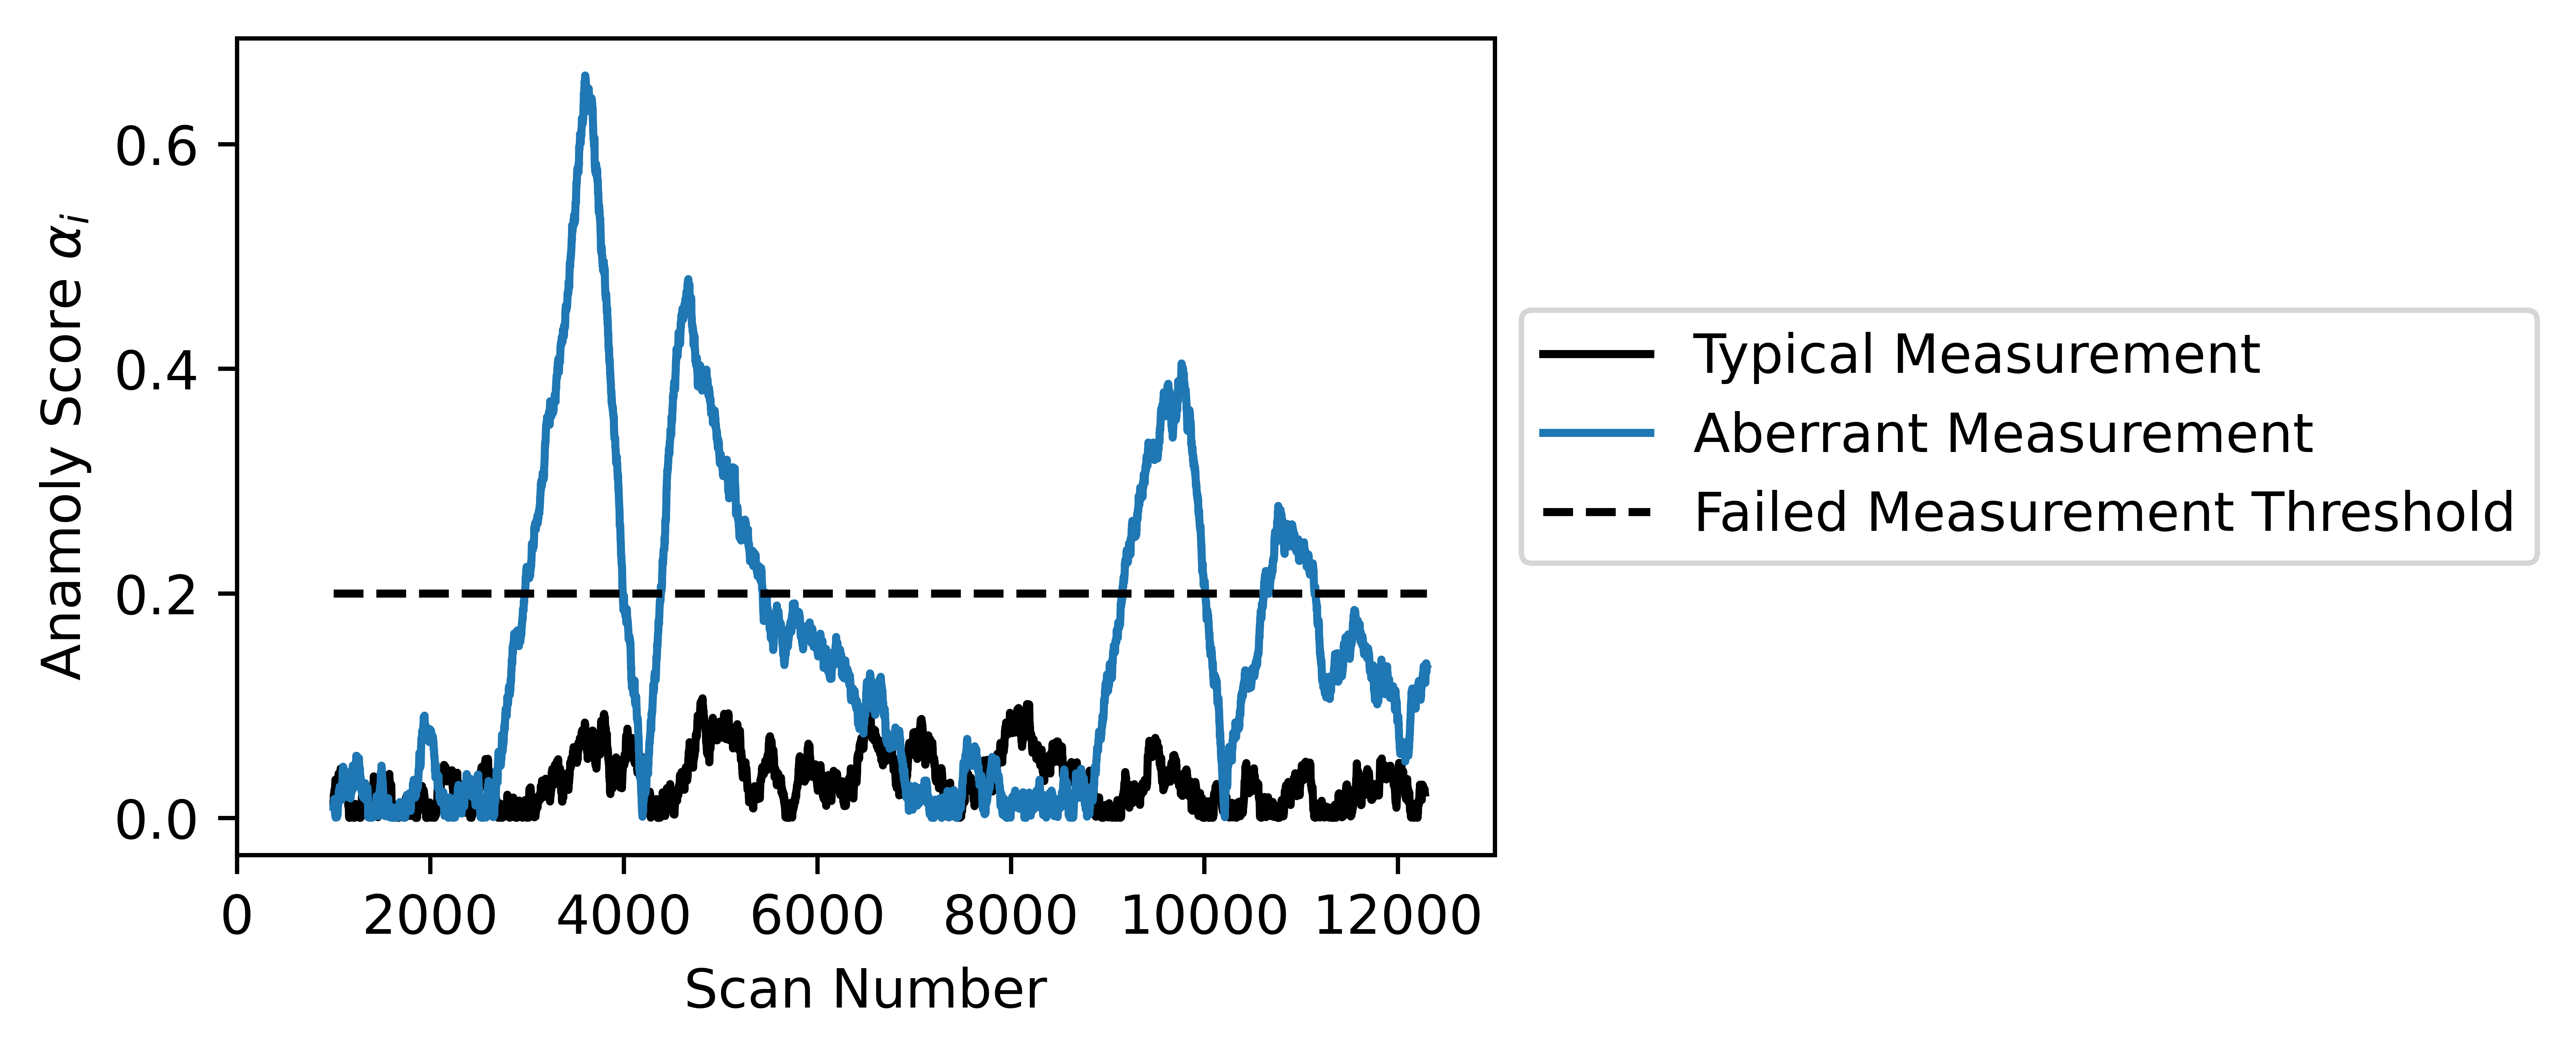

In [2]:
#Plot for the bottom panel of the anomaly detection figure
import matplotlib.pyplot as plt
import numpy as np
from dataScreen_FTStat import subsequenceOutlierDetection

#Set plotting parameters
colors = ['k','tab:orange','tab:red','tab:green','tab:brown','tab:purple','tab:blue']
Subs = ['15N/Unsub']
#Only plotting files 0 and 6
labels = ['Typical Measurement','','','','','','Aberrant Measurement']

#For each sub of interest (here just 15N/Unsub; can evaluate others)
for sub in Subs:
    #Initialize plot
    fig, ax = plt.subplots(figsize = (6*0.7,4*0.7), nrows = 1, ncols = 1, dpi = 1000)
    #In the paper, priorSubsequenceLength = testSubsequenceLength, for clarity. These can be separated.
    priorSubsequenceLength = 1000
    testSubsequenceLength = 1000
    #For files of interest
    for fileIdx in [0,6]:
        cDf = mergedList[fileIdx][0][sub]
        #Get the anomaly scores
        allDev = subsequenceOutlierDetection(cDf, priorSubsequenceLength = priorSubsequenceLength, testSubsequenceLength = testSubsequenceLength)
        #Get the relevant x values
        allDevxs = range(priorSubsequenceLength,len(allDev)+priorSubsequenceLength)
        #Set the threshold
        threshold = 0.2

        #Print proportion above the threshold
        print("Proportion Above")
        print((allDev > threshold).sum() / len(allDev))

        #Plot
        ax.plot(allDevxs,allDev, c = colors[fileIdx], label = labels[fileIdx])
    
    #Plot the threshold
    ax.hlines(threshold, priorSubsequenceLength,len(allDev)+testSubsequenceLength, color = 'k', linestyle = '--', label = 'Failed Measurement Threshold')
        
    #Beautify
    ax.legend(bbox_to_anchor = (1.00,0.7))
    ax.set_xlabel("Scan Number")
    ax.set_ylabel("Anamoly Score " + r"$\alpha_{i}$")
    ax.set_xlim(0,13000)

    #Export
    plt.savefig("Bottom Panel.png", bbox_inches = 'tight', dpi = 1000)

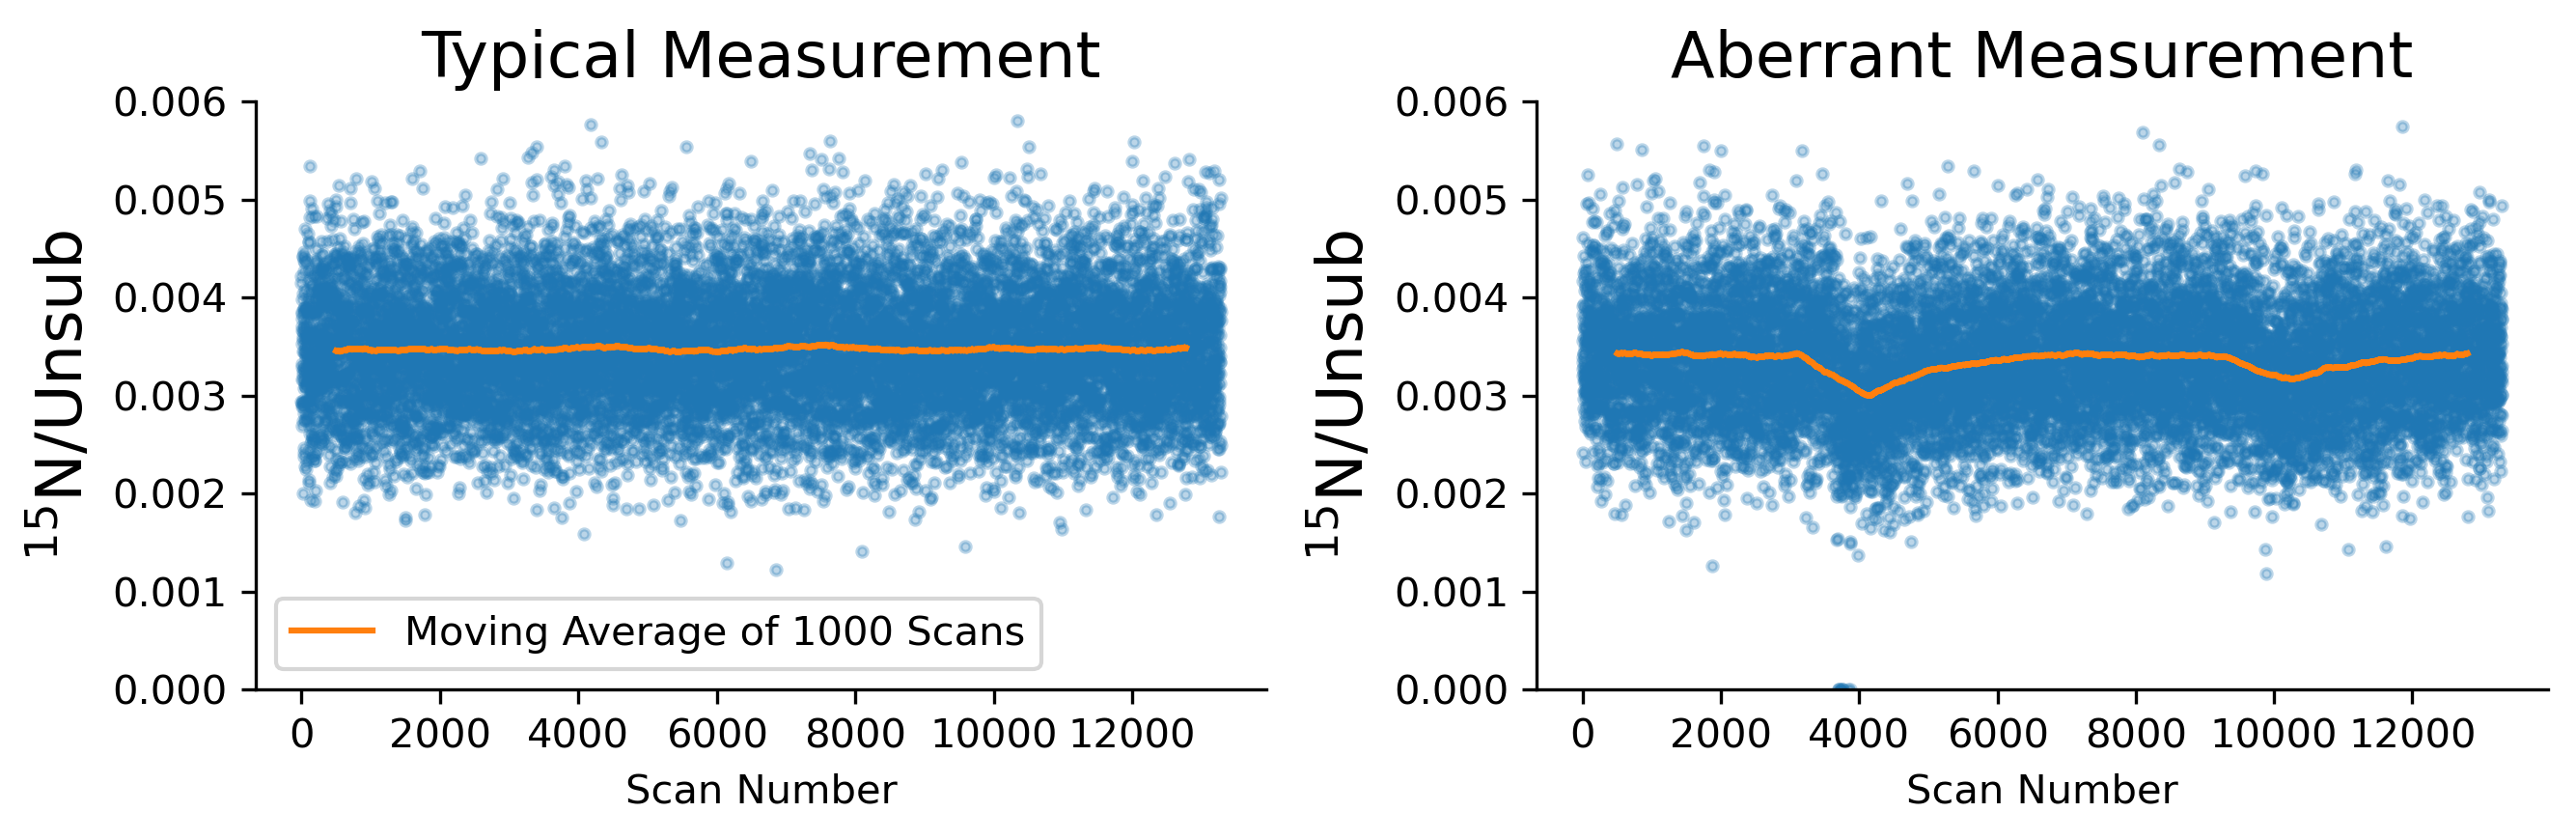

In [3]:
#Plot for the top panel of anomaly detection figure
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9,3), dpi = 300)
targetRat = '15N/Unsub'
sub1, sub2 = targetRat.split('/')

#first 0 indexes into the file, second indexes into the fragment (isoX has a nicer structure; switch to this for future)
cDf = mergedList[0][0]

#Initialize lists for the moving average
series = cDf[targetRat]
l = len(series)
cAx = axes[0]
movingAvg = []

#Calculate moving averages
for i in range(500,len(series)-500):
    current = series[i-500:i+500]
    mean = current.mean()
    movingAvg.append(mean)
    
#Plot series and moving average
cAx.scatter(range(len(series)),series, s = 6, alpha = 0.3)
cAx.plot(range(500,len(movingAvg)+500),movingAvg, label = "Moving Average of 1000 Scans", c = 'tab:orange')

#Beautify
cAx.set_ylim(0,0.006)
cAx.set_ylabel("$^{15}$N/Unsub", fontsize = 16)
cAx.set_xlabel("Scan Number")
cAx.set_title("Typical Measurement", fontsize =16)
cAx.legend()
cAx.spines['right'].set_visible(False)
cAx.spines['top'].set_visible(False)

#Repeat process for the second file
cDf = mergedList[6][0]
series = cDf[targetRat]
l = len(series)
cAx = axes[1]
movingAvg = []

#Calculate moving averages
for i in range(500,len(series)-500):
    current = series[i-500:i+500]
    mean = current.mean()
    movingAvg.append(mean)
    
#Do scan by scan and moving average plots
cAx.scatter(range(len(series)),series,s = 6, alpha = 0.3)
cAx.plot(range(500,len(movingAvg)+500),movingAvg, label = "Moving Average of 1000 Scans", c = 'tab:orange')

#Beautify
cAx.set_ylim(0,0.006)
cAx.set_ylabel("$^{15}$N/Unsub", fontsize = 16)
cAx.set_xlabel("Scan Number")
cAx.set_title("Aberrant Measurement", fontsize =16)
cAx.spines['right'].set_visible(False)
cAx.spines['top'].set_visible(False)

plt.tight_layout()

#Export; append the two plots in Powerpoint or Affinity Designer (etc)
fig.savefig("Good vs Bad 15NUnsub.png", bbox_inches = 'tight', dpi = 1000)

In [4]:
#Prepare methionine data for plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter
from tqdm import tqdm

#First go through a few stages to get the data ready to plot. First fill in 'standardizedDict', the standardized values
standardizedDict = {}

#sampleOutputDict is the object returned by the original read in of the files
fileList = list(sampleOutputDict.keys())
fragmentList = list(sampleOutputDict[fileList[0]].keys())

#Go through files and standardize measurements; for each file...
for i, file in enumerate(fileList):
    #If it is a sample file
    if i % 2 == 1:
        standardizedDict[file + " Standardized"] = {}
        std1Key = fileList[i-1]
        std2Key = fileList[i+1]
        #For each fragment
        for fragment, fragmentData in sampleOutputDict[file].items():
            standardizedDict[file + " Standardized"][fragment] = {}
            #for each isotope
            for isotopeKey, isotopeData in fragmentData.items():
                #Standardize and calculate ratio and error
                standardizedDict[file + " Standardized"][fragment][isotopeKey] = {'Ratio':0,'RSE':0}
                smpRatio = isotopeData['Average']
                smpErr = isotopeData['RelStdError']
                
                std1Ratio = sampleOutputDict[std1Key][fragment][isotopeKey]['Average']
                std1Error = sampleOutputDict[std1Key][fragment][isotopeKey]['RelStdError']
                
                std2Ratio = sampleOutputDict[std2Key][fragment][isotopeKey]['Average']
                std2Error = sampleOutputDict[std2Key][fragment][isotopeKey]['RelStdError']
                
                avgStd = (std1Ratio + std2Ratio) / 2
                avgRat = smpRatio / avgStd
                avgErr = np.array([std1Error, std2Error]).mean()
                comErr = np.sqrt(smpErr**2 + avgErr **2)
                
                #Add to dictionary
                standardizedDict[file + " Standardized"][fragment][isotopeKey] = {'Ratio':avgRat,'RSE':comErr}
                
#Sort the standardized values 
bySub = {}

#Iterate through the standardized dictionary and fill in bySub
#for file
for file, fileData in standardizedDict.items():
    #by fragment
    for fragment, fragmentData in fileData.items():
        #by isotope
        for isotope, isotopeData in fragmentData.items():
            if isotope not in bySub:
                bySub[isotope] = {'Fragments':[],'Ratios':[], 'RSEs':[]}
            ratio = isotopeData['Ratio']
            error = isotopeData['RSE']

            #Fill in data
            bySub[isotope]['Ratios'].append(ratio)
            bySub[isotope]['RSEs'].append(error)
            bySub[isotope]['Fragments'].append(fragment)
            
#Calculate delta values from the standardized comparisons
deltasDict = {}
for sub, subData in bySub.items():
    deltasDict[sub] = {'Deltas':[],'RSEs':[]}
    relDeltas = [1000*(r-1) for r in subData['Ratios']]
    deltasDict[sub]['Deltas'] = relDeltas
    errs = [1000 * e for e in subData['RSEs']]
    deltasDict[sub]['RSEs'] = errs
        
#Now compute the mean of all 3 replicates and the experimental reproducibility
averagedDict = {}

for subKey, subData in deltasDict.items():
    if subKey not in averagedDict:
        averagedDict[subKey] = {'Average':0, 'Std':0}
        
    averagedDict[subKey]['Average'] = np.array(subData['Deltas']).mean()
    averagedDict[subKey]['Std'] = np.array(subData['Deltas']).std()

#Additionally, construct a dictionary that is easier to parse including just the raw ratios for each of the 7 replicates
allFiles = {}
for obsFile, obsDict in sampleOutputDict.items():
    for subKey, subData in obsDict['150'].items():
        if subKey not in allFiles:
            allFiles[subKey] = {'Ratios':[],'Errors':[]}

        allFiles[subKey]['Ratios'].append(subData['Average'])
        allFiles[subKey]['Errors'].append(subData['StdError'])

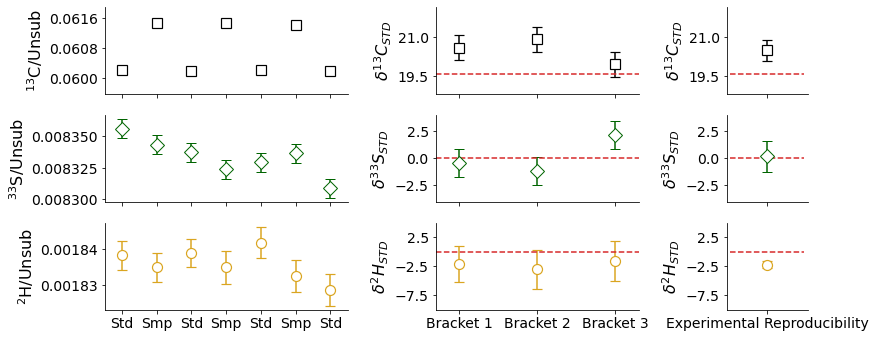

In [5]:
#Plot the information
#Some beautification
matplotlib.rcParams.update({'errorbar.capsize': 5})
font = {'size'   : 14}
matplotlib.rc('font', **font)

#Initialize plot
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15*0.82,6*0.82), 
                         gridspec_kw={'width_ratios': [3, 2.5, 1]}, sharex = 'col')

#Relevant plot parameters
Cmarkeredgecolor = 'k'
Cmarker = 's'
Cmarkersize = 10
Cmarkerfacecolor = 'w'
Cmew = 1.2

Smarkeredgecolor = 'darkgreen'
Smarker = 'D'
Smarkersize = 10
Smarkerfacecolor = 'w'

Hmarkeredgecolor = 'goldenrod'
Hmarker = 'o'
Hmarkersize = 10
Hmarkerfacecolor = 'w'
Hmew = 1.2

actualValueColor = 'tab:red'

#First plot
cAx = axes[0,0]

#13C/Unsub, all 7 raw values
cAx.errorbar(range(7),allFiles['13C/Unsub']['Ratios'], allFiles['13C/Unsub']['Errors'], 
             fmt = Cmarker, markersize = Cmarkersize, mfc = Cmarkerfacecolor, 
             mec = Cmarkeredgecolor, ecolor = Cmarkeredgecolor, mew  = Cmew)

#label
xticks = list(range(7))
xtickLabels = ['Std 1','Smp 1','Std 2','Smp 2','Std 3', 'Smp 3','Std 4']
cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylim(0.0596,0.0619)
cAx.yaxis.set_major_locator(plt.MaxNLocator(3))
cAx.set_ylabel(u"$^{13}$C/Unsub", fontsize = 16)

#13C/Unsub, standardized values
cAx = axes[0,1]

cAx.errorbar(range(3),deltasDict['13C/Unsub']['Deltas'], deltasDict['13C/Unsub']['RSEs'], 
             fmt = Cmarker, markersize = Cmarkersize, mfc = Cmarkerfacecolor, 
             mec = Cmarkeredgecolor, ecolor = Cmarkeredgecolor, mew = Cmew)

#label
xticks = list(range(3))
xtickLabels = ['Bracket 1', 'Bracket 2','Bracket 3']
cAx.set_ylim(18.8,22.2)
cAx.set_xlim(-0.3,2.3)
cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylabel(u"$\delta^{13}C_{STD}$", fontsize = 16)

cAx.hlines(19.578208184438452,-0.5,2.5,linestyle = '--',color = actualValueColor, 
           label = "Independent  Value")

cAx.yaxis.set_major_locator(plt.MaxNLocator(3))

#13C/Unsub, experimental reproducibility
cAx = axes[0,2]

cAx.errorbar(range(1),averagedDict['13C/Unsub']['Average'], averagedDict['13C/Unsub']['Std'], 
             fmt = Cmarker, markersize = Cmarkersize, mfc = Cmarkerfacecolor, 
             mec = Cmarkeredgecolor, ecolor = Cmarkeredgecolor, mew = Cmew)

#label
xticks = list(range(1))
xtickLabels = ['Final Reported Value']
cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylabel(u"$\delta^{13}C_{STD}$", fontsize = 16)
cAx.hlines(19.578208184438452,-0.5,0.5,linestyle = '--',color = actualValueColor, 
           label = "Independently Measured\nor Estimated Value")
cAx.set_ylim(18.8,22.2)
cAx.yaxis.set_major_locator(plt.MaxNLocator(3))


#33S/Unsub, all 7 values
cAx = axes[1,0]

cAx.errorbar(range(7),allFiles['33S/Unsub']['Ratios'], allFiles['33S/Unsub']['Errors'], 
             fmt = Smarker, markersize = Smarkersize, mfc = Smarkerfacecolor, 
             mec = Smarkeredgecolor, ecolor = Smarkeredgecolor)

xticks = list(range(7))
xtickLabels = ['Std 1','Smp 1','Std 2','Smp 2','Std 3', 'Smp 3','Std 4']
cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylabel(u"$^{33}$S/Unsub", fontsize = 16)
cAx.yaxis.set_major_locator(plt.MaxNLocator(3))

#33S/Unsub, 3 standardized values
cAx = axes[1,1]

cAx.errorbar(range(3),deltasDict['33S/Unsub']['Deltas'], deltasDict['33S/Unsub']['RSEs'], 
             fmt = Smarker, markersize = Smarkersize, mfc = Smarkerfacecolor, 
             mec = Smarkeredgecolor, ecolor = Smarkeredgecolor)

cAx.set_ylim(-4,4)
cAx.set_xlim(-0.3,2.3)
xticks = list(range(3))
xtickLabels = ['Bracket 1', 'Bracket 2','Bracket 3']
cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylabel(u"$\delta^{33}S_{STD}$", fontsize = 16)
cAx.hlines(0,-0.5,2.5,linestyle = '--',color = actualValueColor)

#33S/Unsub, Experimental reproducibility
cAx = axes[1,2]

cAx.errorbar(range(1),averagedDict['33S/Unsub']['Average'], averagedDict['33S/Unsub']['Std'], 
             fmt = Smarker, markersize = Smarkersize, mfc = Smarkerfacecolor, 
             mec = Smarkeredgecolor, ecolor = Smarkeredgecolor)

cAx.set_ylabel(u"$\delta^{33}S_{STD}$", fontsize = 16)
cAx.set_ylim(-4,4)
xticks = list(range(1))
xtickLabels = ['Final Reported Value']
cAx.hlines(0,-0.5,0.5,linestyle = '--',color = actualValueColor)
cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)

#D/Unsub, all 7 values
cAx = axes[2,0]

cAx.errorbar(range(7),allFiles['D/Unsub']['Ratios'], allFiles['D/Unsub']['Errors'], 
             fmt = Hmarker, markersize = Hmarkersize, mfc = Hmarkerfacecolor, 
             mec = Hmarkeredgecolor, ecolor = Hmarkeredgecolor, mew  = Hmew)

xticks = list(range(7))
xtickLabels = ['Std','Smp','Std','Smp','Std', 'Smp','Std']
cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_xlim(-0.5,6.5)
cAx.yaxis.set_major_locator(plt.MaxNLocator(3))
cAx.set_ylabel(u"$^{2}$H/Unsub", fontsize = 16)

#D/Unsub, 3 standardized values
cAx = axes[2,1]

cAx.errorbar(range(3),deltasDict['D/Unsub']['Deltas'], deltasDict['D/Unsub']['RSEs'], 
             fmt = Hmarker, markersize = Hmarkersize, mfc = Hmarkerfacecolor, 
             mec = Hmarkeredgecolor, ecolor = Hmarkeredgecolor, mew  = Hmew)

xticks = list(range(3))
xtickLabels = ['Bracket 1', 'Bracket 2','Bracket 3']
cAx.set_ylim(-10,5)
cAx.set_xlim(-0.3,2.3)
cAx.set_yticks([-7.5,-2.5,2.5])
cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylabel(u"$\delta^{2}H_{STD}$", fontsize = 16)
cAx.hlines(0,-0.5,2.5,linestyle = '--',color = actualValueColor, 
           label = "Independent  Value")

#D/Unsub, experimental reproducibility
cAx = axes[2,2]

cAx.errorbar(range(1),averagedDict['D/Unsub']['Average'], averagedDict['D/Unsub']['Std'], 
             fmt = Hmarker, markersize = Hmarkersize, mfc = Hmarkerfacecolor, 
             mec = Hmarkeredgecolor, ecolor = Hmarkeredgecolor, mew  = Hmew)

xticks = list(range(1))
xtickLabels = ['Experimental Reproducibility']
cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylabel(u"$\delta^{2}H_{STD}$", fontsize = 16)
cAx.hlines(0,-0.5,0.5,linestyle = '--',color = actualValueColor, 
           label = "Independently Measured\nor Estimated Value")
cAx.set_ylim(-10,5)
cAx.set_yticks([-7.5,-2.5,2.5])

sns.despine()
plt.tight_layout()

#Export
fig.savefig('Representative Measurements Methionine.jpg', dpi = 1000)